# **Operasi Geometri pada Gambar/Citra**

---
Oleh: Zakiul Fahmi Jailani, MSc.

Disampaikan untuk Mahasiswa/i Teknologi Informasi UIN Ar-Raniry Banda Aceh, semester genap tahun 2022.

Pada pengolahan citra digital, secara umum operasi
Geometrik ditujukan untuk memodifikasi koordinat pixel
dalam suatu citra dengan pendekatan tertentu.

Operasi Geometri berhubungan dengan perubahan bentuk geometri citra, yaitu
baik ukuran ataupun orientasinya. Operasi geometri
diantaranya meliputi flipping (pencerminan), rotating (rotasi/pemutaran), cropping (pemotongan), dan scaling/zooming (penskalaan).

Operasi transformasi geometrik merupakan salah satu teknik pengolahan citra yang penting karena memiliki pengaplikasian yang luas. Misalnya, penggunaan sederhananya adalah dalam  mengubah skala konten grafik saat menampilkannya di desktop vs seluler.

![picture](https://drive.google.com/uc?export=view&id=1fz9RNmW3KsLWOlrFv0PH1nh9VH_R7KIU)

Operasi Geometrik juga merupakan metode dasar dalam aplikasi Augmented Reality. Dibawah ini contoh bagaimana ketika Anda membeli kacamata, tidak perlu ke toko, tinggal melihat saja bagaimana kacamata tersebut cocok di muka Anda, lalu bisa langsung beli online. 

![picture](https://drive.google.com/uc?export=view&id=1g-hiJPpnPsGthXusnSW_ouRE28K2hb6q)


Kita akan mencoba mempelajari operasi transformasi geometri pada gambar/citra ini, menggunakan NumPy terlebih dahulu, baru kemudian kita menggunakan OpenCV.

Melakukan operasi transformasi geometri pada gambar itu mudah sekali, karena gambar digital adalah matriks yang berisi angka-angka piksel. Sehingga dengan rumus matematika, kita akan mudah mengubah-ubah sifat geometris dari sebuah gambar.

Berikut merupakan dokumentasi lengkap operasi geometris pada gambar menggunakan openCV di link berikut: [klik saya](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html).



## 1. Penggeseran Citra (Image Translation)

Seperti biasa, download dulu gambar kucing disini: [cat.jpg](https://drive.google.com/file/d/1g-nCOzkw-7mWJepxnlwn7U5bhPyrBxm5/view?usp=sharing).

In [ ]:
# upload gambar cat.jpg 
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving cat.jpg to cat.jpg


(-0.5, 599.5, 599.5, -0.5)

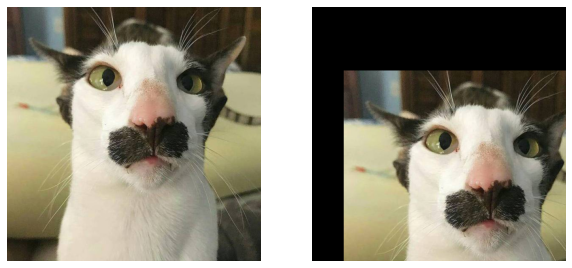

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("cat.jpg")
h, w = image.shape[:2]

half_height, half_width = h//4, w//8
transition_matrix = np.float32([[1,
                                 0,
                                 half_width], 
                                [0,
                                 1,
                                 half_height]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharex=True, sharey=True)

ax0.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax1.axis('off')

Bisa kita lihat gambar diatas bergeser ke kanan. Ini adalah bentuk paling sederhana dari operasi geometri pada gambar.

Dalam Python dan OpenCV, matriks 2D pada dasarnya terletak di sudut kiri atas dan dimulai dari titik koordinat x,y = (0, 0). 

![picture](https://drive.google.com/uc?export=view&id=1g04nKKigq33KxbQYzNbWWt2pr7Z3maJ4)


## 2. Image Rotation (Rotasi gambar)

Sebuah gambar/citra dapat diputar dengan besaran sudut (𝜃) tertentu searah jarum jam ataupun berlawanan arah jarum jam dengan pusat putaran pada sebuah koordinat tertentu (x,y).

![picture](https://drive.google.com/uc?export=view&id=1g05KMFREla3tDvs3H_8NboXv-7CnEDba)





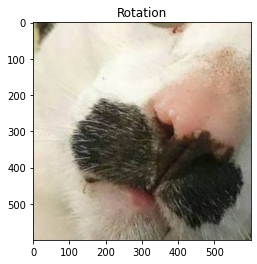

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread("cat.jpg")
h, w = image.shape[:2]
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -35, 2.5) # coba cek fungsi .getRotationMatrix2D di dokumentas OpenCV
rotated_image = cv.warpAffine(image,
rotation_matrix, (w, h))
plt.imshow(cv.cvtColor(rotated_image,
cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

## 3. Resizing image (Mengubah ukuran gambar/citra)

Ukuran asli gambar: (600, 600, 3)
ukuran gambar yang telah berubah: (1600, 4200, 3)


(-0.5, 4199.5, 1599.5, -0.5)

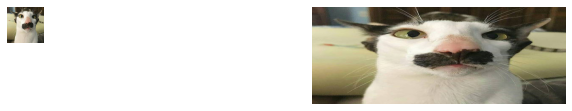

In [ ]:
image = cv.imread("cat.jpg")
resize = cv.resize(image, (4200, 1600))
print('Ukuran asli gambar:', image.shape)
print('ukuran gambar yang telah berubah:', resize.shape)


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharex=True, sharey=True)

ax0.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(cv.cvtColor(resize, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax1.axis('off')



# Image Denoising

Gambar yang banyak noise (gangguan) dapat di hilangkan menggunakan openCV. Download gambar [noise](https://drive.google.com/file/d/1g1vsrkzcWyZZmdaLBaGFCsOL77Gn-LYz/view?usp=sharing).

In [ ]:
# upload gambar noise.jpg 
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving noise.jpg to noise.jpg


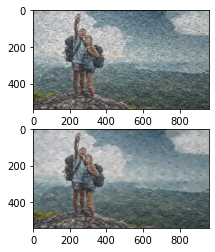

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('noise.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) # fungsi denoising

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

Coba gambarnya kita perbesar dan kemudian kita ubah warna gambarnya menjadi Grayscale (abu-abu):

(-0.5, 959.5, 539.5, -0.5)

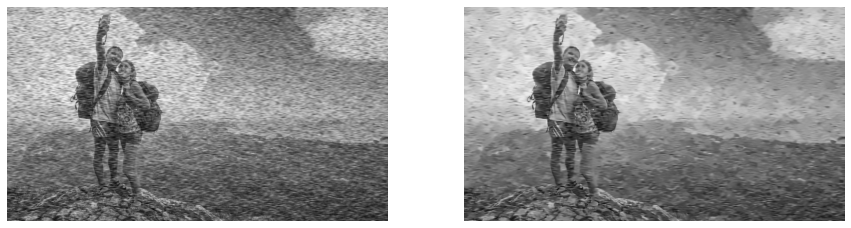

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('noise.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb



fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

ax0.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY), cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(cv2.cvtColor(rgb_dst, cv2.COLOR_BGR2GRAY), cmap=plt.cm.gray)
ax1.axis('off')



Bagaimana jika kita ubah menjadi HSV:

(-0.5, 959.5, 539.5, -0.5)

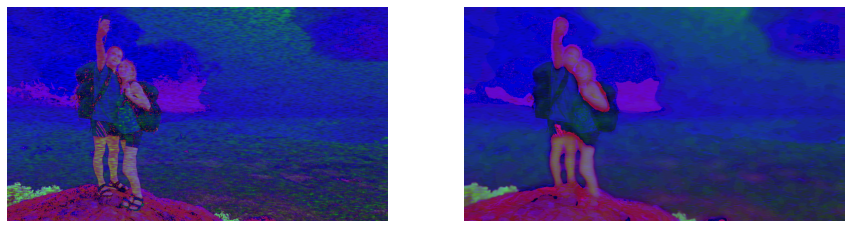

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('noise.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb



fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

ax0.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV), cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(cv2.cvtColor(rgb_dst, cv2.COLOR_BGR2HSV), cmap=plt.cm.gray)
ax1.axis('off')



# Kompresi Gambar menggunakan PCA (Principal Component Analysis)

Sekarang kita akan melakukan kompresi gambar menggunakan PCA (Principal Component Analysis).

Secara umum, PCA adalah sebuah algoritma unsupervised dalam Machine Learning untuk mereduksi dimensi data dari sebuah dataset yang masif. 

Seringkali data yang tersedia memiliki lebih dari 1000 dimensi (sementara manusia hanya dapat memvisualisasikan hingga 3 atau 4 dimensi saja), sehingga menggunakan PCA dapat direduksi menjadi beberapa dimensi saja yang dapat divisualisasikan.

Oleh karena itu, PCA juga dapat digunakan untuk mereduksi dimensi dari sebuah gambar (kompress).

Download gambar [rose.jpg](https://drive.google.com/file/d/1g2EAZxXuwFpFqjOYxR9Bltb6jacitvbq/view?usp=sharing).

In [ ]:
# upload gambar rose.jpg 
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving rose.jpg to rose.jpg


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

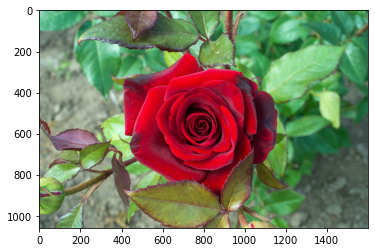

resolusi gambar:  (1059, 1600, 3)
ukuran gambar:  5083200
tipe data:  uint8


In [ ]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print("resolusi gambar: ", img.shape) #menampilkan resolusi
print("ukuran gambar: ", img.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", img.dtype) #image datatype (kedalaman bit) 

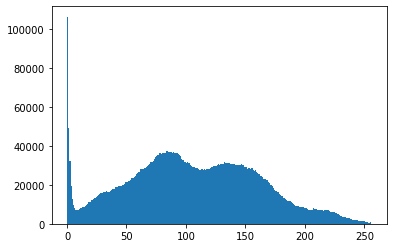

In [ ]:
plt.hist(img.ravel(),256,[0,256]); 

plt.show()

Ingat baik-baik ukuran resolusi, ukuran data dan tipe data nya.

Kita pertama-tama akan mengeluarkan tiga channel warna dari gambar tersebut yaitu menjadi channel Biru, channel Hijau, dan channel Merah. 

RGB.

Masih ingatkan? 

Lalu setelah itu kita akan menjalankan algoritma PCA secara terpisah pada setiap dataset channel-channel tersebut. Baru kemudian setelah itu  kita akan menggabungkan hasil PCA dari masing-masing channel-channel tersebut dengan tujuan untuk merekonstruksi gambar.

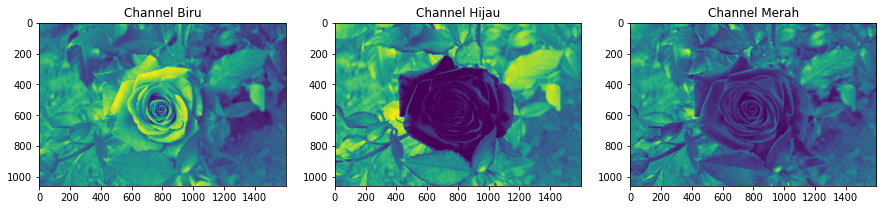

In [ ]:
# Membagi menjadi channel-channel warna RGB
blue,green,red = cv2.split(img)

# Plot gambarnya
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Channel Biru")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Channel Hijau")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Channel Merah")
plt.imshow(red)

plt.show()

Cek data channel biru

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,166,166,165,165,164,164,164,163,165,164,...,38,37,35,34,34,33,31,30,28,27
1,166,164,164,164,163,163,161,161,164,163,...,36,34,34,34,33,32,30,29,27,27
2,164,164,164,162,161,160,159,159,161,160,...,34,30,34,33,32,31,29,27,26,26
3,164,164,162,161,159,157,157,154,156,155,...,34,30,34,33,32,30,28,27,26,25
4,162,162,161,159,157,154,153,153,153,152,...,36,34,36,34,32,30,28,26,26,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,134,134,135,135,134,128,122,118,114,109,...,97,97,99,99,98,98,97,96,95,95
1055,132,133,134,134,133,127,122,117,113,109,...,97,97,99,99,98,97,96,95,94,94
1056,131,130,130,129,128,123,119,117,110,105,...,97,98,98,97,95,94,94,93,91,90
1057,127,126,125,124,123,119,115,112,110,105,...,95,96,96,95,93,92,92,91,89,88


> Bagaimana dengan channel merah dan hijau? apa bedanya?

Kembali ke gambar Rose.jpg tadi. Mari kita skalakan dulu nilai setiap piksel dibagikan dengan range warna piksel yang ada dalam gambar digital ke angka maksimal yaitu 255.

Ini bertujuan agar nilai data dalam setiap piksel akan berada pada range angka antara 0 dan 1.

In [ ]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [ ]:
# cek tampilan array nya sekarang
df_blue

array([[0.65098039, 0.65098039, 0.64705882, ..., 0.11764706, 0.10980392,
        0.10588235],
       [0.65098039, 0.64313725, 0.64313725, ..., 0.11372549, 0.10588235,
        0.10588235],
       [0.64313725, 0.64313725, 0.64313725, ..., 0.10588235, 0.10196078,
        0.10196078],
       ...,
       [0.51372549, 0.50980392, 0.50980392, ..., 0.36470588, 0.35686275,
        0.35294118],
       [0.49803922, 0.49411765, 0.49019608, ..., 0.35686275, 0.34901961,
        0.34509804],
       [0.47843137, 0.47843137, 0.4745098 , ..., 0.35686275, 0.34901961,
        0.34509804]])

Kita telah melihat bahwa setiap channel gambar memiliki 1059 dimensi, dan sekarang kita akan memasukkan hanya 50 dimensi kedalam algoritma PCA. Lalu kita akan memasukkan dan mentransformasikan data dan menyesuaikan serta mengubah data dan memeriksa seberapa banyak 'variance' yang terjelaskan setelah kita reduksi data menjadi 50 dimensi saja.

Kemudian masukkan data `df_blue`, `df_green`, dan `df_red` tersebut kedalam PCA:

In [ ]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print("resolusi channel biru dari gambar: ", trans_pca_b.shape)
print("resolusi channel merah dari gambar: ", trans_pca_r.shape)
print("resolusi channel hijau dari gambar: ", trans_pca_g.shape)

resolusi channel biru dari gambar:  (1059, 50)
resolusi channel merah dari gambar:  (1059, 50)
resolusi channel hijau dari gambar:  (1059, 50)


Kita telah memasukkan data ke dalam algoritma PCA, sekarang kita akan periksa resolusi (berapa dimensi) dari setiap gambar yang telah diubah di setiap channel warna RGB:

In [ ]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(1059, 50)
(1059, 50)
(1059, 50)


1059 x 50 dimensi. Sesuai harapan!

Mari kita periksa jumlah 'variance ratio' dari 50 komponen PCA (yaitu 50 nilai Eigen yang paling mendominasi) untuk setiap channel warna RGB dalam gambar yang dimaksud:

In [ ]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9604998840253232
Green Channel: 0.9735317871487575
Red Channel  : 0.9475808261535557


Luar biasa!

Karena hanya menggunakan 50 komponen saja, kita dapat menyimpan sekitar 99% variance dalam data kita.

Mari kita plot diagram batang untuk memeriksa 'variance ratio' dari masing-masing nilai Eigen secara terpisah untuk masing-masing dari 3 channel warna RGB:

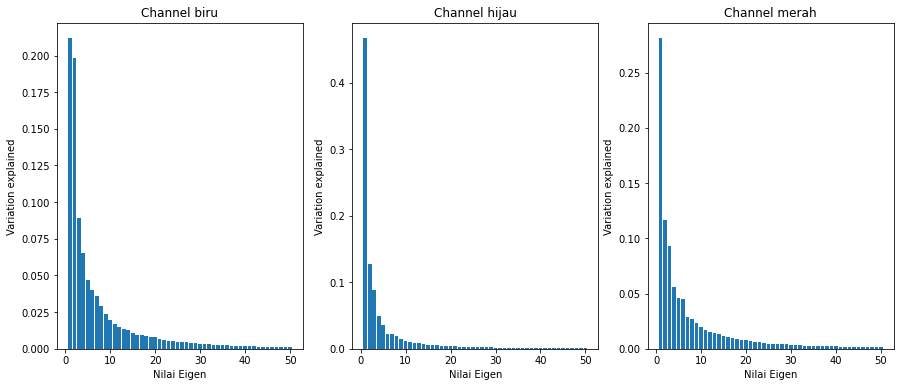

In [ ]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Channel biru")
plt.ylabel('Variation explained')
plt.xlabel('Nilai Eigen')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_) # sesuaikan dengan jumlah dimensi yang dipakai

fig.add_subplot(132)
plt.title("Channel hijau")
plt.ylabel('Variation explained')
plt.xlabel('Nilai Eigen')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_) # sesuaikan dengan jumlah dimensi yang dipakai

fig.add_subplot(133)
plt.title("Channel merah")
plt.ylabel('Variation explained')
plt.xlabel('Nilai Eigen')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_) # sesuaikan dengan jumlah dimensi yang dipakai
plt.show()

Rekonstruksi gambar dan visualisasikan.

Kita sudah berhasil mengurangi dimensi dari gambar kita menggunakan PCA. Sekarang kita akan memvisualisasikan gambar kita lagi, oleh karena itu, kita harus membalikkan proses transformasi data terlebih dahulu dan kemudian menggabungkan data-data tersebut dari semua 3 channel warna RGB menjadi satu.

In [ ]:
b_arr = pca_b.inverse_transform(trans_pca_b) #membalikkan proses transformasi
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(1059, 1600) (1059, 1600) (1059, 1600)


Kita bisa menggabungkan semua channel warna RGB dari gambar kita menjadi satu kembali menggunakan fungsi `.merge` pada openCV:

In [ ]:
img_reduced= cv2.merge((b_arr, g_arr, r_arr))
print("resolusi gambar: ", img_reduced.shape) #menampilkan resolusi
print("ukuran gambar: ", img_reduced.size) # menampilkan ukuran data pada media penyimpan
print("tipe data: ", img_reduced.dtype) # image datatype (kedalaman bit) 

resolusi gambar:  (1059, 1600, 3)
ukuran gambar:  5083200
tipe data:  float64


Hasilnya sama seperti resolusi dari gambar diawal kan? 

Sekarang coba kita tampilkan kedua gambar yang dimaksud (asli dan yang diperkecil) secara berdampingan.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


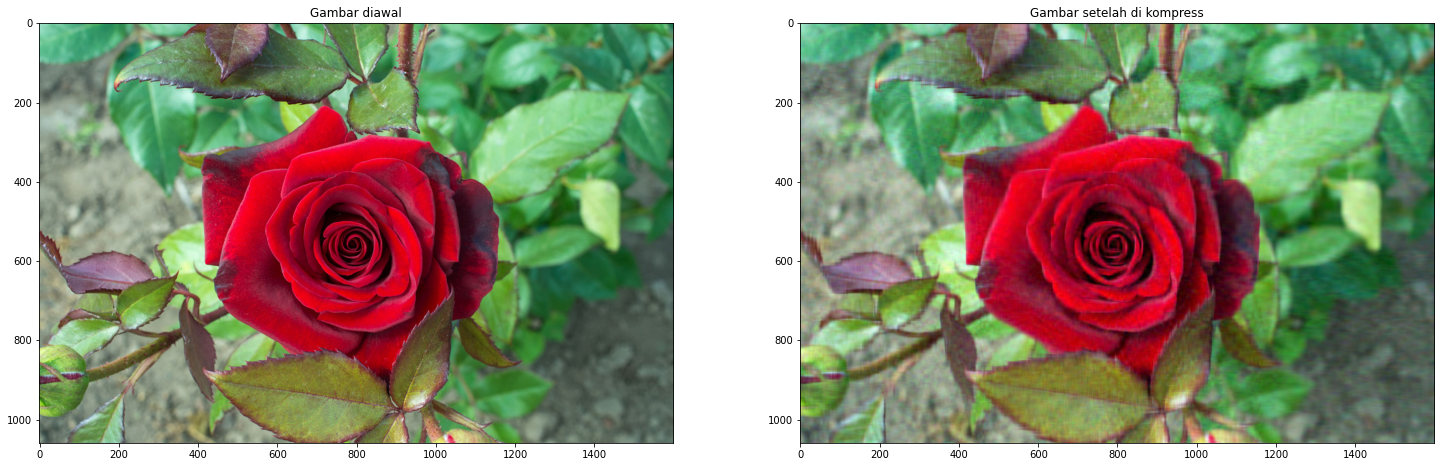

In [ ]:
fig = plt.figure(figsize = (25, 10)) 
fig.add_subplot(121)
plt.title("Gambar diawal")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Gambar setelah di kompress")
plt.imshow(img_reduced)
plt.show()


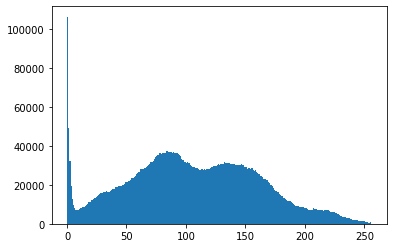

In [ ]:
plt.hist(img.ravel(),256,[0,256]); 

plt.show()

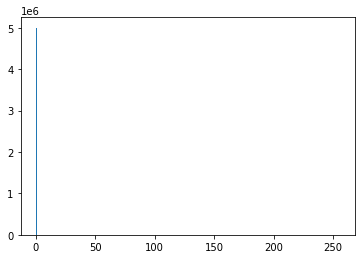

In [ ]:
plt.hist(img_reduced.ravel(),256,[0,256]); 

plt.show()

In [ ]:
print("resolusi gambar awal: ", img.shape) #menampilkan resolusi
print("ukuran gambar awal: ", img.size) #menampilkan ukuran data pada media penyimpan
print("tipe data awal: ", img.dtype) #image datatype (kedalaman bit) 
print()
print("resolusi gambar kompress: ", img_reduced.shape) #menampilkan resolusi
print("ukuran gambar kompress: ", img_reduced.size) #menampilkan ukuran data pada media penyimpan
print("tipe data kompress: ", img_reduced.dtype) #image datatype (kedalaman bit) 

resolusi gambar awal:  (1059, 1600, 3)
ukuran gambar awal:  5083200
tipe data awal:  uint8

resolusi gambar kompress:  (1059, 1600, 3)
ukuran gambar kompress:  5083200
tipe data kompress:  float64


Bereh!

Gambar yang sudah dikompress (sebelah kanan) terlihat sangat mirip dengan gambar asli (sebelah kiri), walaupun kita telah mengurangi/mereduksi dimensi dari setiap channel warna RGB dari gambar tersebut yaitu menjadi 50 dimensi saja, dari 1059 dimensi diawal.

Menggunakan gambar yang sudah di kompress, sekarang gambar tersebut akan lebih mudah untuk di proses atau disimpan oleh sistem komputer kita.

# **Latihan**

Cari sebuah gambar dengan resolusi tinggi dan dengan warna yang beragam!

Lalu kompress menggunakan PCA!

Kompress dimensi gambar yang kalian miliki menjadi ANGKA SEBUAH dimensi.

ANGKA SEBUAH adalah nilai 2 digit terakhir dari NIM Anda!

Contoh:
Nama: Ahmad Farhan Habibie
NIM : 190705082

nilai 2 digit terakhir dari NIM tersebut adalah 82, maka kompress dimensi gambar yang Anda miliki menjadi 82 dimensi saja!

>Jangan lupa cantumkan jawaban dari pertanyaan berikut:
1. Tampilkan gambar asli dan gambar ter kompress secara berdampingan!
2. Berapa jumlah 'variance ratio' untuk setiap channel warna RGB dalam gambar Anda?
3. Berapa resolusi dan ukuran gambar asli, serta apa tipe datanya?
4. Berapa resolusi dan ukuran gambar ter kompress, serta apa tipe datanya?

KIRIM file .iynb serta gambar - nya KE EMAIL zakiulfahmi.fst@ar-raniry.ac.id dengan format:
MK_HARI_NAMA_LATIHAN_04

Dikumpulkan sebelum pertemuan minggu depan yaitu tanggal 2 Juni 2022, pukul 23.59 WIB!

## References

- Marleny, F. D. (2021). Pengolahan citra digital menggunakan Python (Vol. 1). CV. Pena Persada.

- https://github.com/NVIDIA/DALI/blob/main/docs/examples/math/geometric_transforms.ipynb

- https://subscription.packtpub.com/book/data/9781800201774/2/ch02lvl1sec09/geometric-transformations

- https://towardsdatascience.com/image-geometric-transformation-in-numpy-and-opencv-936f5cd1d315

- https://colab.research.google.com/github/dinhanhthi/data-science-learning/blob/master/projects/mini-projects/K_Means_image_compression.ipynb#scrollTo=5m6QMf95DtS5

- https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118